### Confusion metrix allow us to see where our algorithm went wrong

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [8]:
def iris_type(row):
    if row['Target'] == 0:
        return 'Iris-setosa'
    elif row['Target'] == 1:
        return 'Iris-versicolor'
    elif row['Target'] == 2:
        return 'Iris-virginica'

In [20]:
iris = load_iris()
df =pd.DataFrame(iris.data)
df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
df['Target'] = iris.target
df['Iris_Type'] = df.apply(iris_type, axis = 1)

In [21]:
x = df[df.columns[0:4]].values
y = df[df.columns[5]].values

In [22]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(x,y,test_size = 0.2)

In [25]:
knn_clf = KNeighborsClassifier(n_neighbors=9)
knn_clf.fit(X_train,y_train)
knn_predictions = knn_clf.predict(X_test)
print('Accuracy of the knn algorithm is: {}'.format(accuracy_score(y_test, knn_predictions)))

Accuracy of the knn algorithm is: 0.9666666666666667


### here we not getting 100 percent accuracy so we will apply sk learn confusion matrix 

In [27]:
confusion_matrix(y_test, knn_predictions)

array([[11,  0,  0],
       [ 0, 11,  0],
       [ 0,  1,  7]], dtype=int64)

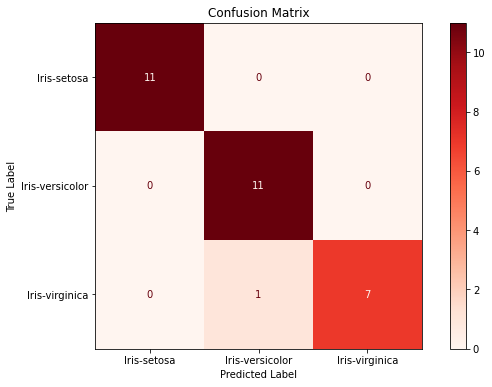

In [34]:
matrix = plot_confusion_matrix(knn_clf, X_test, y_test, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

so this is how it shows where our algorithms are going wrong. its just not provide us the accuracy score but this also gives us that extra dimention of information where our model is performing 